Nguyễn Vũ Ánh Ngọc - 11214369 - DSEB63  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [2]:
# Read traffic_by_month.csv file
traffic = pd.read_csv('data/midterm2-data/traffic_by_month.csv')
traffic.head()

,month,traffic_volume
0,1,4495.613727
1,2,4711.198394
2,3,4889.409560
3,4,4906.894305
4,5,4911.121609


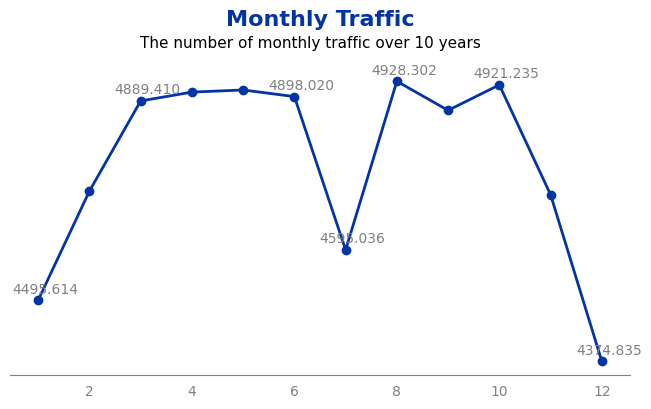

In [3]:
X, y = traffic['month'], traffic['traffic_volume']

# 1.1 Create a line chart for this data
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X, y, linewidth=2, marker='.', markersize=12, color='#0334a6')

# 1.2 Remove the left, right, top spine
ax.spines[['left', 'right', 'top']].set_visible(False)

# 1.3 Remove the ticks located at the bottom
ax.tick_params(bottom=False)

# 1.4 Color the xtick labels and the spine to grey
ax.tick_params(axis='x', colors='grey')
ax.spines['bottom'].set_color('grey')

# 1.4 Annotate some data points
for x, y in zip(X, y):
    if x in [1, 3, 6, 7, 8, 10, 12]:
        y_label = '{:.3f}'.format(y)
        ax.annotate(y_label, (x, y), color='grey', textcoords='offset points', xytext=(5, 5), ha='center')

# 1.5 Add title and subtitle for this chart.
plt.title('Monthly Traffic', loc='center', fontsize=16, pad=30, fontdict={'fontweight': 'bold', 'color': '#0334a6'})
plt.suptitle('The number of monthly traffic over 10 years', fontsize=11, y=0.96)

# Remove the y axis label
ax.get_yaxis().set_visible(False)

plt.show()

# Problem 2

In [4]:
# Read sales.csv file
sales = pd.read_csv('data/midterm2-data/sales.csv')
sales.head()

,DateTime,NbOfSalesEmployees,Revenue(Millions)
0,Jan-13,82,0.6
1,Feb-13,91,0.5
2,Mar-13,105,0.7
3,Apr-13,112,0.9
4,May-13,111,0.6


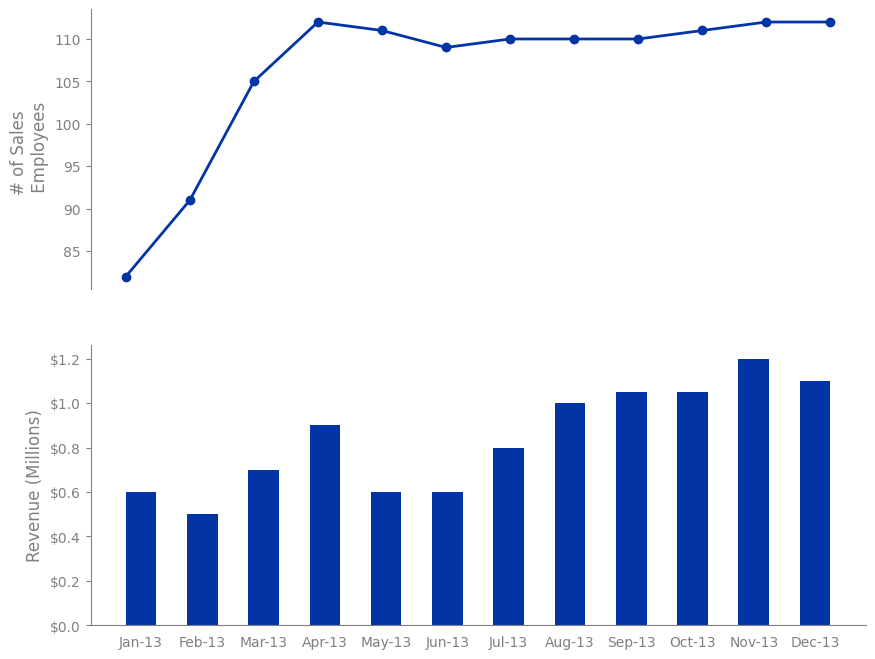

In [5]:
# Create 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Draw a line chart in the first subplot
ax1.plot(sales['DateTime'], sales['NbOfSalesEmployees'], marker='.', linestyle='solid', linewidth=2, markersize=12, color='#0334a6')

# Remove spines
ax1.spines[['right', 'top', 'bottom']].set_visible(False)

# Remove x axis
ax1.get_xaxis().set_visible(False)

# Set spine to grey
ax1.tick_params(axis='y', which='both', colors='grey')
ax1.spines['left'].set_color('grey')

# Set y axis label
ax1.set_ylabel('# of Sales \n Employees', color='grey', fontsize=12)

# Draw a bar chart in the second subplot
ax2.bar(sales['DateTime'], sales['Revenue(Millions)'], width=0.5, color='#0334a6')

# Remove spines
ax2.spines[['right', 'top']].set_visible(False)
ax2.spines['bottom'].set_color('grey')

# Set spine to grey
ax2.tick_params(axis='y', which='both', colors='grey')
ax2.spines['left'].set_color('grey')

# Remove x tick
ax2.tick_params(axis='x', which='both', bottom=False, colors='grey')

# Format y tick labels
ax2.set_yticks(np.arange(0, 1.3, 0.2))
ax2.set_yticklabels(['${:.1f}'.format(x) for x in ax2.get_yticks()])

# Set y axis label
ax2.set_ylabel('Revenue (Millions)', color='grey', fontsize=12)

plt.show()


# Problem 3

In [6]:
# Read file nutrition_facts.csv
nutrition = pd.read_csv('data/midterm2-data/nutrition_facts.csv')
nutrition.head()

,Unnamed: 0,Menu,Calories
0,0,Brewed CoffeeShort,3
1,1,Brewed CoffeeTall,4
2,2,Brewed CoffeeGrande,5
3,3,Brewed CoffeeVenti,5
4,4,Caffè LatteShort Nonfat Milk,70


In [7]:
# top 20 highest-calorie items on Starbucks’ menu
top_20 = nutrition.sort_values(by='Calories', ascending=False)
top_20 = top_20[:20]
top_20

,Unnamed: 0,Menu,Calories
344,102,Lentils & Vegetable Protein Bowl with Brown Rice,650
303,61,Green Goddess Avocado Salad,620
296,54,Strawberries & Jam Sandwich,600
307,65,Roasted Turkey & Dill Havarti Sandwich,600
312,70,Za'atar Chicken & Lemon Tahini Salad,570
347,105,Turkey Pesto Panini,560
311,69,Turkey & Fire-Roasted Corn Salad,560
308,66,Seared Steak & Cheddar Sandwich,530
317,75,PB&J Protein Box,520
84,84,White Chocolate Mocha (Without Whipped Cream)2...,510


In [8]:
# Define a simple categorization function based on keywords in the menu item names
def categorize_item(item_name):
    if 'Sandwich' in item_name or 'Panini' in item_name or 'Breakfast' in item_name:
        return 'Sandwich'
    elif 'Salad' in item_name:
        return 'Salad'
    elif 'Mocha' in item_name or 'Coffee' in item_name or 'Latte' in item_name:
        return 'Drink'
    elif 'Protein Box' in item_name or 'Loaf' in item_name or 'Brownie' in item_name or 'Doughnut' in item_name:
        return 'Bakery Item'
    else:
        return 'Other'

# Apply categorization to the 'Menu' items
top_20['Category'] = top_20['Menu'].apply(categorize_item)


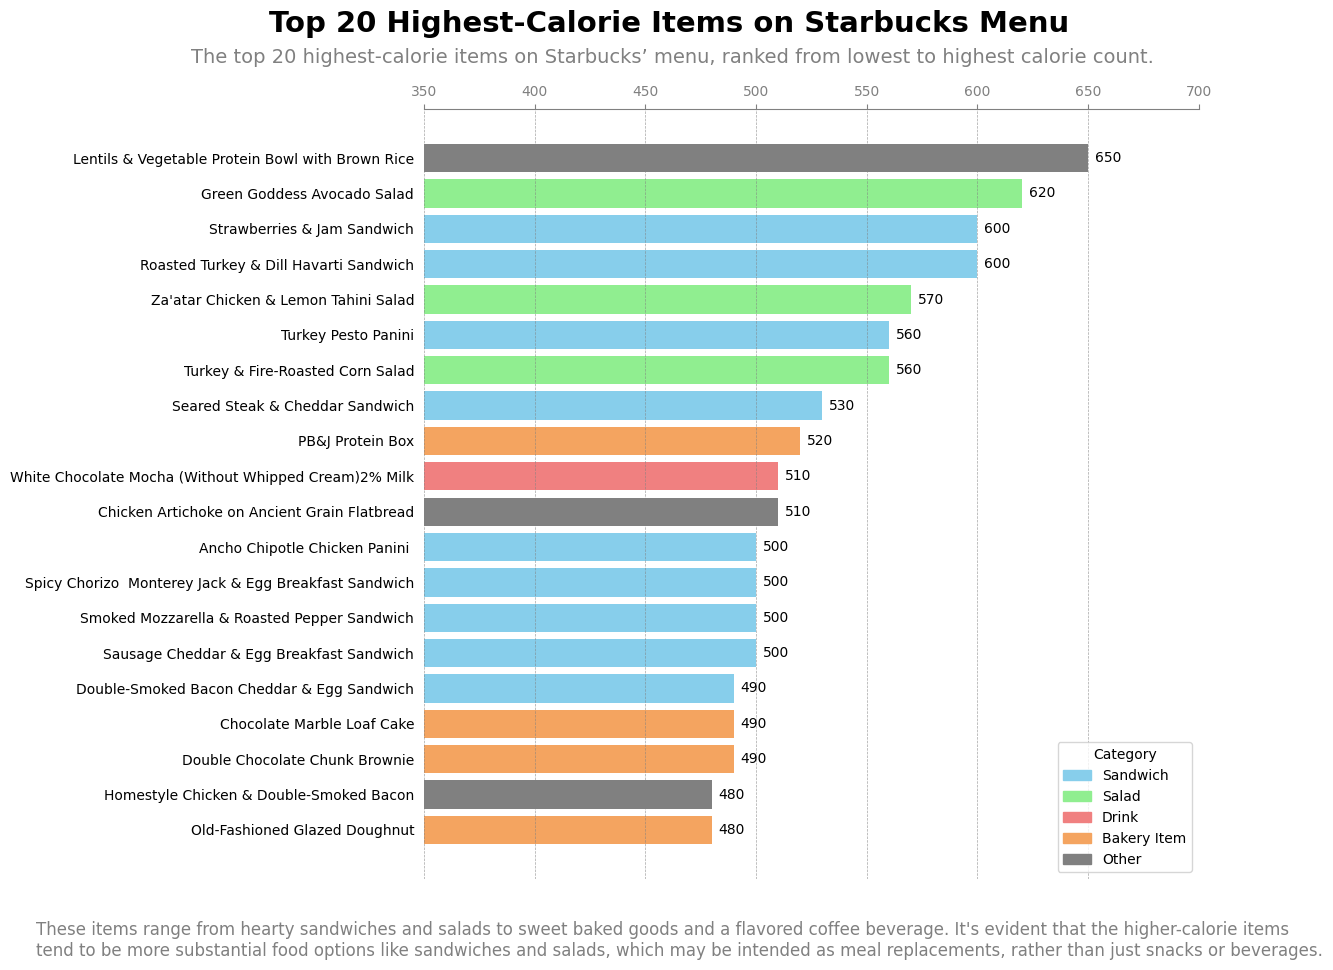

In [9]:
# Visualize top 20 highest-calorie items on Starbucks menu
fig, ax = plt.subplots(figsize=(10, 10))

# Create a horizontal bar chart
# ax.barh(top_20['Menu'], top_20['Calories'], color='#00704A')
colors = {'Sandwich': 'skyblue', 'Salad': 'lightgreen', 'Drink': 'lightcoral', 'Bakery Item': 'sandybrown', 'Other': 'grey'}
ax.barh(top_20['Menu'], top_20['Calories'], color=[colors[cat] for cat in top_20['Category']])
ax.invert_yaxis()

# Set grid
ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.5, alpha=0.7)

# Remove all spines
ax.spines[['left', 'right', 'bottom']].set_visible(False)

# Annotate each bar with its calorie count
for x, y in zip(top_20['Calories'], top_20['Menu']):
    x_label = '{:.0f}'.format(x)
    ax.annotate(x_label, (x, y), color='black', textcoords='offset points', xytext=(5, 0), ha='left', va='center')

# Color the xtick labels and the spine to grey
ax.tick_params(axis='x', colors='grey')
ax.spines['top'].set_color('grey')

# Set x axis limit
ax.set_xlim(350, 700)
# set tick top
ax.xaxis.tick_top()

# Remove y tick
ax.tick_params(axis='y', which='both', left=False)

# Add title and subtitle for this chart.
ax.text(-0.2, 1.1, 'Top 20 Highest-Calorie Items on Starbucks Menu', fontsize=21, fontweight='bold', transform=ax.transAxes, fontname='sans-serif')
ax.text(-0.3, 1.06, 'The top 20 highest-calorie items on Starbucks’ menu, ranked from lowest to highest calorie count.', fontsize=14, transform=ax.transAxes, color='grey')

# Comment
cmt = """These items range from hearty sandwiches and salads to sweet baked goods and a flavored coffee beverage. It's evident that the higher-calorie items 
tend to be more substantial food options like sandwiches and salads, which may be intended as meal replacements, rather than just snacks or beverages.​​"""
ax.text(-0.5, -0.1, cmt, fontsize=12, transform=ax.transAxes, color='grey')

# Legend 
legend_patches = [plt.Rectangle((0,0), 1, 1, color=colors[label]) for label in colors]
ax.legend(legend_patches, colors.keys(), title='Category')

# Display the chart
plt.show()